# Studying nonconvex constellations via $\Delta\Phi(x,p)$

We apply $\Delta\Phi(x,p)$ and its visualizations to the study of a couple of Engelsma's 
examples of nonconvex constellations.  These are relatively long admissible constellations of low span
such that
$$ \pi(|s|) < {\rm length}(s).$$
These examples $s$ show that if the $k$-tuple conjecture is true, then the convexity conjecture
for $\pi(x)$ is false.  For this $s$ we have
$$ \pi(\gamma_0+|s|) > \pi(\gamma_0) + \pi(|s|).$$

We start with a driving term for $s$ in ${\mathcal G}(11^\#)$ with initial generator $\gamma_0 = 1271$ and trace its evolution through subsequent stages of the sieve.

Guided by step R2 of the recursion $R: {\mathcal G}(p_{k-1}^\#) \longrightarrow {\mathcal G}(p_k^\#)$,
we use primorial coordinates or the primorial expansion for $\gamma_0(p_k)$ to track the incidences of $s$.
$$ \gamma_0(p_k) = \gamma_0 + m_1 \cdot 11^\# + m_2 \cdot 13^\# + \cdots + m_k \cdot p_{k-1}^\#$$
or 
$$ \gamma_0(p_k) = \gamma_0 + 11^\# (m_1 + 13(m_2 + 17(m_3 + \cdots +  p_{k-1}^\# \cdot m_k ))\cdots)$$
Each coefficient $m_i$ lies in the range $0 \le m_i < p_i$ and indicates which copy of ${\mathcal G}(p_{i-1}^\#)$ this image of $s$ lies in
under step R2 for ${\mathcal G}(p_{i-1}^\#)\longrightarrow {\mathcal G}(p_i^\#)$.

In [1]:
import pandas as pd
import numpy as np
import array
import itertools
from sympy import mod_inverse
import random

import matplotlib.pyplot as plt
from plotnine import ggplot, geom_point, aes, geom_line, theme, ggsave, labs

import gc
import psutil
import sys

In [2]:
primes19=np.load('primes19.npy')

In [3]:
primes19[0:20]

array([ 23,  29,  31,  37,  41,  43,  47,  53,  59,  61,  67,  71,  73,
        79,  83,  89,  97, 101, 103, 107])

In [4]:
# PRIMES:  The array smallp runs through primes from 2 up to 19#
smallp = np.concatenate(([2,3,5,7,11,13,17,19],primes19))
smallp[0:52]

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239])

This notebook focuses on the Engelsma $(459,3242)$-counterexample to the convexity conjecture for constellations among primes.
We use $\Delta Phi$ and ${\mathcal G}(29^\#)$ to visualize the constellation.  
The array DelPhi contains the lower points on the vertical segments for $\Delta \Phi(x,p)$.  The upper points on these segments are (DelPhi+1)

In [5]:
# retrieve data from files and print sizes & lengths
G29 = np.load('G29uint.npy')
DelPhi = np.load('DelPhi29.npy')  # DelPhi contains the lower points on the vertical segments

In [6]:
print(f"G29 is {sys.getsizeof(G29)/(1024**2) :.3f} MB, length {len(G29)}")

G29 is 1949.063 MB, length 1021870080


In [7]:
print(f"DelPhi is {sys.getsizeof(DelPhi)/(1024**2) :.3f} MB, length {len(DelPhi)}")

DelPhi is 7796.250 MB, length 1021870081


In [8]:
# block to check the available system memory
gc.collect()
memory = psutil.virtual_memory()
available_memory = memory.available
del memory
print(f"Available memory: {available_memory / (1024 ** 2):.2f} MB")

Available memory: 3677.38 MB


In [9]:
lenG = len(G29)

## Engelsma counterexamples to the convexity conjecture
Engelsma et al. have identified several examples of admissible constellations for which their lengths $J$ exceed the number of primes under their span
$$ \pi(|s|) < J$$
The shortest counterexample $s$ has length $J=458$ and span $|s|=3240$.  This counterexample can be extended by a single gap $2$ to produce a second admissible counterexample of length $J=459$ and span $|s|=3242$.

This constellation has a unique driving term in the cycle ${\mathcal G}(11^\#)$ with $\gamma_0=1271$.  This driving term has a unique image through the next several stages of the sieve.

In [10]:
# Engelsma example - primorial coordinates from Excel workbook for counterexample driving term in G29
gamma0 = 1271+2310*(5+13*(8+17*(9+19*(17+23*21))))
gamma0

4854692651

In [11]:
# index for gamma0 in G29
xEngelsma = 766785216
np.sum(G29[0:xEngelsma])

np.uint64(4854692650)

In [12]:
# the unique driving term for Engelsma (459,3242) in G(29#) has length 528
Engelsma29=G29[xEngelsma:(xEngelsma+528)]
Engelsma29

array([ 2,  4,  2,  4,  8,  6,  4,  2, 10,  6,  2,  6, 12,  4,  6, 12,  2,
        4,  2,  4,  8,  6, 12,  4,  6,  8,  6,  4,  2,  4,  6,  8,  6,  4,
       12,  2, 10,  2,  4, 12,  2, 10,  2,  4,  6,  8,  6,  6,  6,  4,  6,
       12,  6,  2,  4,  8,  6,  4,  6,  2,  4,  8, 12,  4,  6,  6,  2,  6,
       10,  2, 22,  2,  6,  4,  6,  2, 10, 12,  8,  6,  4,  2,  6,  4,  6,
        8,  4,  2,  4,  2, 18, 10,  2,  4,  6, 14,  4,  2, 12, 10,  2,  4,
       12,  2, 18, 10,  2,  6,  6,  4,  6,  8, 10,  2, 10,  6,  8,  6,  4,
        2, 12,  6, 10,  6,  6,  8,  6, 10,  6,  8,  4,  2,  6, 10, 12,  6,
        2, 10,  2,  6,  4,  2,  4,  6,  6,  2, 10, 12, 14,  4,  8,  4,  8,
        6,  4,  6,  2, 12,  6,  6,  4,  6,  6,  2, 10,  2,  4, 14, 12,  4,
        2,  4,  6,  2, 10,  2,  4, 12,  2, 10,  2,  6,  4, 14,  6,  4,  2,
        4, 14,  4,  6,  2, 10,  2,  6,  6, 10,  6,  2, 16,  2, 12, 10,  2,
        4,  2,  4,  6,  8,  4,  6,  6,  6,  8, 12,  4, 14,  4,  2,  4, 14,
        6, 10,  6,  6,  2

In [13]:
# Engelsma counterexample of 459 gaps of span 3242.
Engelsma = np.array([2,4,2,4,8,6,4,2,10,6,2,6,12,4,6,12,2,4,2,4,8,6,12,4,6,8,6,4,2,4,14,10,12,
                     2,10,2,4,12,2,10,2,4,6,8,6,6,6,4,6,12,6,2,4,8,6,10,2,4,8,16,6,6,2,6,10,2,22,
                     2,6,4,6,2,10,12,8,6,6,6,4,6,8,4,2,4,2,18,10,2,10,14,4,14,10,2,4,12,2,18,10,2,
                     6,6,10,18,2,10,6,8,6,4,14,6,10,6,6,8,6,10,6,8,4,2,6,10,12,6,12,2,6,4,2,4,6,6,2,
                     10,12,14,4,8,4,8,6,4,6,2,12,6,6,10,6,12,2,4,14,12,4,2,4,6,12,2,4,12,12,2,6,4,20,
                     4,2,18,4,6,2,10,2,6,6,10,8,16,2,12,10,2,4,6,6,12,6,6,6,20,4,14,4,2,4,14,6,16,8,
                     6,10,2,10,2,6,12,10,12,6,2,10,8,4,2,18,10,2,6,4,18,6,2,22,12,6,2,16,6,6,2,6,6,4,
                     14,10,2,10,14,6,4,6,6,2,18,10,8,4,2,18,6,4,6,6,6,8,6,4,2,10,2,12,4,2,10,2,12,4,2,
                     4,8,6,10,6,6,2,6,16,18,2,6,4,8,6,10,6,6,8,10,2,12,6,4,2,4,2,10,12,2,6,4,8,10,2,16,
                     30,8,4,2,6,4,8,16,14,12,4,2,10,12,6,24,2,4,2,18,6,10,6,2,6,6,16,8,4,6,2,4,18,8,
                     4,8,6,6,6,10,8,4,2,4,12,2,12,6,10,14,10,8,6,4,2,10,6,8,10,2,4,8,10,8,4,6,2,6,10,
                     6,8,6,10,2,10,2,12,4,6,8,6,4,2,16,8,4,8,10,12,2,4,2,22,6,2,4,6,14,6,4,8,10,2,6,10,
                     2,10,12,6,8,4,2,10,8,6,6,16,18,6,8,6,4,6,6,8,6,6,6,4,6,2,12,4,2,10,14,6,10,2,6,10,
                     6,6,2,10,2,6,4,14,4,2], dtype=int)

In [14]:
print(f"Nonconvex s of length {len(Engelsma)} and span {np.sum(Engelsma)} vs pi({smallp[456]})=457 and pi({smallp[457]})=458")

Nonconvex s of length 459 and span 3242 vs pi(3229)=457 and pi(3251)=458


## $\Delta \Phi$ to picture $p$-rough numbers

The count of $p$-rough numbers up through $x$ is denoted $\Phi(x,p)$.
The graph of $\Phi(x,p)$ has a line of symmetry
$$ \tilde{\Phi} = \frac{\phi(p^\#)}{p^\#} x = \frac{1}{\mu} x $$
where $\mu = \frac{p^\#}{\phi(p^\#)}$ is the mean size of the gaps in
$\mathcal{G}(p^\#)$.

So we work with $\Delta \Phi(x,p)$, which measures the deviation of $\Phi(x,p)$ around its line of symmetry.
$$ \Delta \Phi(x,p) = \Phi(x,p) - \frac{1}{\mu} x$$

The deviations of the $p$-rough numbers from their line of symmetry
$$\tilde{\Phi} = \frac{1}{\mu}x$$ 
are periodic and bounded.  Thus the behavior of $\Phi(x,p)$ is completely described by the behavior of $\Delta \Phi(x,p)$
over the first cycle $\mathcal{G}(p^\#)$, or using the rotational symmetry around $x=1+\frac{p^\#}{2}$ over the first
half of this cycle.

$\Delta \Phi(x,p)$ provides a good visualization of the $p$-rough numbers.

In [15]:
# average gap size for G(29#)
mu_gap = (29/28)*(23/22)*(19/18)*(17/16)*(13/12)*(11/10)*(210/48)
mu_recip = -1/mu_gap
print("mu",mu_gap, "neg reciprocal (slope)", mu_recip)

mu 6.33122875072338 neg reciprocal (slope) -0.15794722310195222


In [16]:
def interleave_np(arr1, arr2):
    stacked_arr = np.stack((arr1, arr2),axis=1)
    return stacked_arr.flatten().tolist()

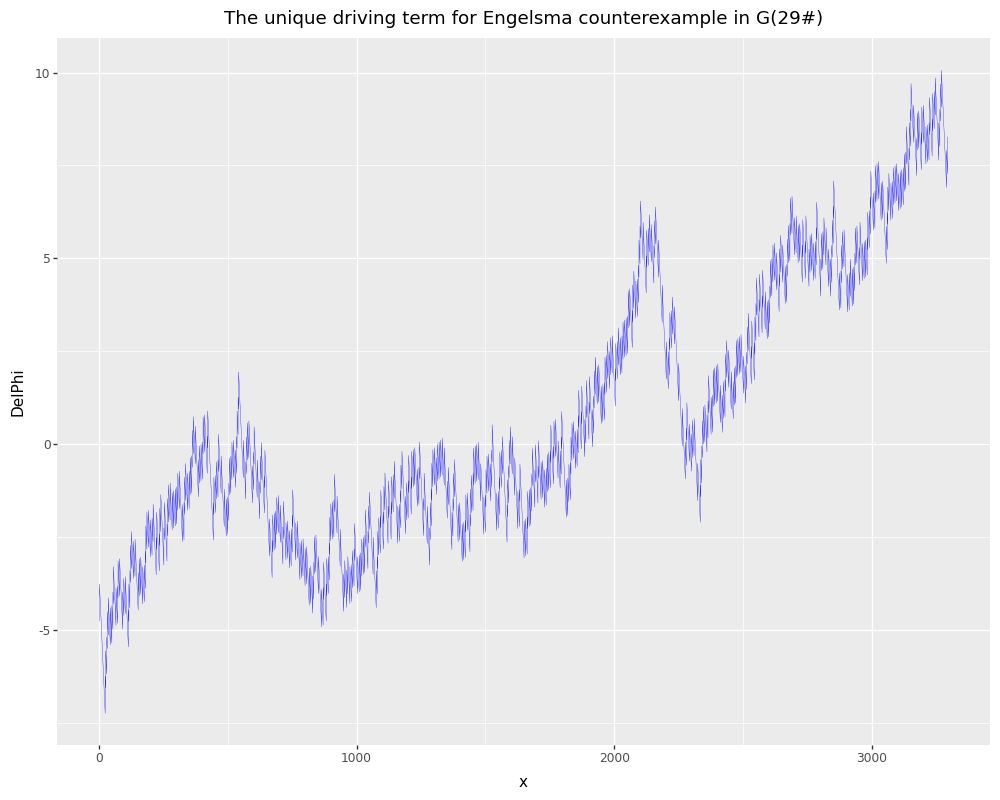

In [17]:
# Interleaving data to get the stepped graph, rendering the vertical segments
# midpoint = 510935040
# pts0 = 510900000
# pts1 = pts0 + 2500
# NOTE: [19 Mar 2025] halfspans: 300, 1000, 5000, 25000, 80000  
# max value at 167215228
xmid = 167215228
xhalfspan = 300
xEngelsma = 766785216  # 
pts0 = xEngelsma-2
pts1 = xEngelsma+531
delx = np.cumsum(G29[pts0:pts1], dtype=float)
delphi = DelPhi[(pts0+1):(pts1+1)]
delxB = interleave_np(delx,delx)
delphiB = interleave_np(delphi,(delphi +1))
data_sample = {'x': delxB, 'DelPhi': delphiB}
df = pd.DataFrame(data_sample)
dphi_plot = ggplot(df, aes(x='x',y='DelPhi'))+geom_line(size=0.125, color='blue')+theme(figure_size=(10,8))+labs(title='The unique driving term for Engelsma counterexample in G(29#)')
#print(plot)
dphi_plot.draw()

In [18]:
# This function returns a list of available residues mod inp that begin admissible images of constellation incons
def admissible(inp, incons):
    # calculate list of covered residues mod p by the input constellation
    rez=0
    covered_rez={0}
    i=0
    while (i < len(incons)):
        rez = (rez + incons[i])% inp
        if rez not in covered_rez:
            covered_rez.add(rez)
        i += 1
    # are all residues covered?
    n_available_rez = inp - len(covered_rez)
    i=1
    available_rez = set()
    # each entry in covered_rez corresponds to a starting residue of (inp-rez)mod inp
    while (i < inp):
        test_rez = inp - i
        if test_rez not in covered_rez:
            available_rez.add(i)
        i += 1
    return available_rez

In [19]:
rez11 = admissible(11, Engelsma)
rez11

{6}

In [20]:
# For each prime >= 11, so index i >= 4, we record the list of admissible residues for gamma_0 mod p[i]
rezlist = []
i=4
while (smallp[i] < 5000):
    p = smallp[i]
    rezp = admissible(p,Engelsma)
    rezlist.append(rezp)
    i += 1

In [21]:
num_admissible = [len(rezlist[i]) for i in range(len(rezlist))]
num_admissible = np.array(num_admissible)

In [22]:
# This is a list of the NUMBER of admissible residues mod p starting at p=11 for the counterexample
num_admissible

array([   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    2,    2,    1,    1,    3,
          1,    2,    2,    5,    4,   10,    6,    5,    6,   13,   10,
         12,    8,   13,    9,   17,   15,   17,   26,   21,   17,   21,
         29,   24,   31,   32,   39,   37,   38,   41,   48,   53,   49,
         55,   59,   63,   69,   66,   74,   82,   89,   83,   89,   95,
         98,  105,  100,  100,  109,  115,  112,  116,  128,  128,  135,
        129,  145,  141,  149,  148,  158,  153,  166,  179,  181,  186,
        197,  194,  203,  201,  219,  219,  215,  222,  228,  229,  239,
        247,  249,  256,  255,  263,  266,  269,  282,  277,  284,  296,
        298,  307,  318,  335,  333,  331,  339,  343,  351,  350,  362,
        357,  378,  383,  394,  400,  400,  406,  409,  410,  416,  439,
        436,  437,  439,  464,  465,  471,  463,  4

In [23]:
# this function calculates the value of mk such that 
#  0 <= mk < pk  and  mk*pml(p_{k-1}) + r0 = rk mod pk
# reminder for indexing that pk = smallp[k+4], a shift of 4, and p0=11
def primorialm(k,rk,r0):
    pk = smallp[k+4]
    i = 0
    pmlp = 1
    while (i < k+4):
        pmlp = (pmlp * smallp[i]) % pk
        i += 1
    mk = (mod_inverse(pmlp, pk) * (rk-r0) ) % pk
    return mk

In [24]:
# For the primorial coordinates for the counterexample we start in G(11#), so we start with the unique driving term in that cycle
Engelsma11 = np.array([2,4,2,4,6,2,6,4,2,4,6,6,2,6,6,6,4,6,8,4,2,4,2,4,8,6,4,8,4,6,2,6,6,4,2,4,6,8,4,2,4,2,10,2,10,2,4,2,4,6,2,10,2,4,6,8,6,4,2,6,4,6,8,4,6,2,4,
              8,6,4,6,2,4,6,2,6,6,4,6,6,2,6,6,4,2,10,2,10,2,4,2,4,6,2,6,4,2,10,6,2,6,4,2,6,4,6,8,4,2,4,2,12,6,4,6,2,4,6,2,12,4,2,4,8,6,4,2,4,2,10,2,10,6,2,
              4,6,2,6,4,2,4,6,6,2,6,4,2,10,6,8,6,4,2,4,8,6,4,6,2,4,6,2,6,6,6,4,6,2,6,4,2,4,2,10,12,2,4,2,10,2,6,4,2,4,6,6,2,10,2,6,4,14,4,2,4,2,4,8,6,4,
              6,2,4,6,2,6,6,4,2,4,6,2,6,4,2,4,12,2,12,4,2,4,6,2,6,4,2,4,6,6,2,6,4,2,6,4,6,8,4,2,4,2,4,14,4,6,2,10,2,6,6,4,2,4,6,2,10,2,4,2,12,10,2,4,2,
              4,6,2,6,4,6,6,6,2,6,4,2,6,4,6,8,4,2,4,6,8,6,10,2,4,6,2,6,6,4,2,4,6,2,6,4,2,6,10,2,10,2,4,2,4,6,8,4,2,4,12,2,6,4,2,6,4,6,12,2,4,2,4,8,6,4,6,2,
              4,6,2,6,10,2,4,6,2,6,4,2,4,2,10,2,10,2,4,6,6,2,6,6,4,6,6,2,6,4,2,6,4,6,8,4,2,6,4,8,6,4,6,2,4,6,8,6,4,2,10,2,6,4,2,4,2,10,2,10,2,4,2,4,8,6,4,
              2,4,6,6,2,6,4,8,4,6,8,4,2,4,2,4,8,6,4,6,6,6,2,6,6,4,2,4,6,2,6,4,2,4,2,10,2,10,2,6,4,6,2,6,4,2,4,6,6,8,4,2,6,10,8,4,2,4,2,4,8,10,6,2,4,8,6,
              6,4,2,4,6,2,6,4,6,2,10,2,10,2,4,2,4,6,2,6,4,2,4,6,6,2,6,6,6,4,6,8,4,2,4,2,4,8,6,4,8,4,6,2,6,6,4,2,4,6,8,4,2,4,2,10,2,10,2,4,2,4,6,2,10,2,
              4,6,8,6,4,2,6,4,6,8,4,6,2,4,8,6,4,6,2,4,6,2,6,6,4,6,6,2,6,6,4,2,10,2,10,2,4,2,4,6,2,6,4,2,10,6,2,6,4,2,6,4,6,8,4,2,4,2,12,6,4,6,2,4,6,2,
              12,4,2,4,8,6,4,2,4,2,10,2,10,6,2,4,6,2,6,4,2,4,6,6,2,6,4,2,10,6,8,6,4,2,4,8,6,4,6,2,4,6,2,6,6,6,4,6,2,6,4,2,4,2,10,12,2,4,2,10,2,6,4,2,4,6,
              6,2,10,2,6,4,14,4,2], dtype=int)
print(f"Driving term for Engelsma (459,3242) counterexample: len {len(Engelsma11)} and span {sum(Engelsma11)}")

Driving term for Engelsma (459,3242) counterexample: len 674 and span 3242


In [25]:
# Develop the primorial coordinates for our Engelsma counterexample, noting the length of the driving term as the sieve progresses
k = 1
gamma_expansion = [1271]         # start the expansion with gamma0 in G(11#)
constellationk = Engelsma11.copy()
while (num_admissible[k] == 1 and k < len(rezlist)):  # unique admissible instance for p
    pk = smallp[k+4]
    target_residue = list(rezlist[k])[0]
    # calculate residue r0 modulo pk
    # set initial conditions for this loop
    i = 1
    r0 = gamma_expansion[0] % pk
    rpml = 2310 % pk  # initialize this factor at 11#
    while (i < k):  # the expansion for r nests from right to left
        r0 = (r0 + gamma_expansion[i] * rpml) % pk
        rpml = (rpml * smallp[i+4]) % pk
        i += 1
    # calculate next primorial coefficient mk
    mk = primorialm(k,target_residue,r0)
    gamma_expansion.append(mk)
    # perform any interior fusions indicated for this image of s
    r0 = target_residue
    i=0
    while (i < len(constellationk)):
        r0 = (r0+constellationk[i]) % pk
        if (r0 == 0):
            constellationk[i] = constellationk[i] + constellationk[i+1]
            r0 = constellationk[i+1] % pk
            constellationk[i+1] = 0
        i += 1
    constellationk = constellationk[ constellationk != 0]
    print(f"k {k:3d} pk {pk:3d} mk {mk:3d} r {target_residue:3d} length {len(constellationk)}  ") # , end='\r')
    k += 1

k   1 pk  13 mk   5 r   3 length 622  
k   2 pk  17 mk   8 r  16 length 589  
k   3 pk  19 mk   9 r  10 length 565  
k   4 pk  23 mk  17 r  12 length 544  
k   5 pk  29 mk  21 r  25 length 528  
k   6 pk  31 mk  29 r  16 length 516  
k   7 pk  37 mk  13 r   3 length 506  
k   8 pk  41 mk   2 r  37 length 495  
k   9 pk  43 mk   8 r  22 length 489  
k  10 pk  47 mk   0 r  24 length 485  
k  11 pk  53 mk  32 r   9 length 479  
k  12 pk  59 mk  45 r  30 length 478  
k  13 pk  61 mk  47 r  22 length 474  
k  14 pk  67 mk  27 r  34 length 471  
k  15 pk  71 mk  28 r  36 length 469  
k  16 pk  73 mk  27 r  34 length 466  
k  17 pk  79 mk  24 r  40 length 466  
k  18 pk  83 mk   0 r  42 length 466  
k  19 pk  89 mk   9 r  38 length 464  
k  20 pk  97 mk  15 r  69 length 462  
k  21 pk 101 mk  68 r  76 length 461  
k  22 pk 103 mk 100 r  52 length 461  
k  23 pk 107 mk  53 r  54 length 461  
k  24 pk 109 mk  45 r  76 length 460  
k  25 pk 113 mk   7 r 100 length 459  
k  26 pk 127 mk  24 r  64

In [26]:
gammam_prefix = np.array(gamma_expansion)
gammam_prefix

array([1271,    5,    8,    9,   17,   21,   29,   13,    2,    8,    0,
         32,   45,   47,   27,   28,   27,   24,    0,    9,   15,   68,
        100,   53,   45,    7,   24,    5])

In [27]:
# We extend the primorial coordinates for the 48 images up through k=35 and pk=173
k0=28
k1=36
gammam_list = []
num_instances=1
k=k0
while (k <= k1):
    num_instances *= num_admissible[k]
    k += 1
print(f"Expecting {num_instances} instances")

k=k0
i=0
pk = smallp[k+4]

# initiate the extensions in first iteration on k
while (i < num_admissible[k]):
    gammam_list.append(list(gammam_prefix))

    target_residue = list(rezlist[k])[i]
    # calculate residue r0 modulo pk
    # set initial conditions for this loop
    j = 1
    r0 = gammam_list[i][0] % pk
    rpml = 2310 % pk  # initialize this factor at 11#
    while (j < k):  # the expansion for r nests from right to left
        r0 = (r0 + gammam_list[i][j] * rpml) % pk
        rpml = (rpml * smallp[j+4]) % pk
        j += 1
    # calculate next primorial coefficient mk
    mk = primorialm(k,target_residue,r0)
    (gammam_list[i]).append(mk)

    print(f"k {k} p {smallp[k+4]} i {i} targetr {target_residue} r0 {r0}")
    for element in gammam_list[i]:
        print(f"{element:3d}", end=" ")
    print()
    i += 1

# now iterate k through the primes pk
k += 1

while (k <= k1):
    pk = smallp[k+4]
    
    iprefix=0
    num_prefixes = len(gammam_list)
    # iprefix is the index through existing primorial expansions
    # i is the index through admissible residues at this stage
        
    while (iprefix < num_prefixes):
        # calculate r0 mod pk
        j = 1
        r0 = gammam_list[iprefix][0] % pk
        rpml = 2310 % pk  # initialize this factor at 11#
        while (j < k):  # the expansion for r nests from right to left
            r0 = (r0 + gammam_list[iprefix][j] * rpml) % pk
            rpml = (rpml * smallp[j+4]) % pk
            j += 1

        # extend the first copy in place
        # save the prefix
        gamma_start = list(gammam_list[iprefix].copy())
        # calculate next primorial coefficient mk
        target_residue = list(rezlist[k])[0]
        mk = primorialm(k,target_residue,r0)
        (gammam_list[iprefix]).append(mk)

        # print(f"Initial k {k} p {smallp[k+4]} i {iprefix} targetr {target_residue} r0 {r0} length {len(gammam_list[iprefix])}")
        
        i=1
        while (i < num_admissible[k]):
            icopy = len(gammam_list)
            gammam_list.append(gamma_start.copy())  # icopy is the index for this copy
            target_residue = list(rezlist[k])[i]
            mk = primorialm(k,target_residue,r0)
            (gammam_list[icopy]).append(mk)
            # print(f"Copy {icopy} k {k} p {smallp[k+4]} i {iprefix} {i} targetr {target_residue} r0 {r0} length {len(gammam_list[icopy])}")

            i += 1

        iprefix += 1

    k += 1

Expecting 240 instances
k 28 p 137 i 0 targetr 1 r0 20
1271   5   8   9  17  21  29  13   2   8   0  32  45  47  27  28  27  24   0   9  15  68 100  53  45   7  24   5   6 
k 28 p 137 i 1 targetr 97 r0 20
1271   5   8   9  17  21  29  13   2   8   0  32  45  47  27  28  27  24   0   9  15  68 100  53  45   7  24   5  55 


In [28]:
i=0
while (i < len(gammam_list)):
    print(f"{i:3d}:", end=' ')
    for element in gammam_list[i]:
        print(f"{element:2d}", end=' ')
    print()
    i += 1

  0: 1271  5  8  9 17 21 29 13  2  8  0 32 45 47 27 28 27 24  0  9 15 68 100 53 45  7 24  5  6  3 28 131 24 149 23 162 11 
  1: 1271  5  8  9 17 21 29 13  2  8  0 32 45 47 27 28 27 24  0  9 15 68 100 53 45  7 24  5 55 97 73 134 32 143 162 21 149 
  2: 1271  5  8  9 17 21 29 13  2  8  0 32 45 47 27 28 27 24  0  9 15 68 100 53 45  7 24  5  6 124 55 108 49 82 15 116 113 
  3: 1271  5  8  9 17 21 29 13  2  8  0 32 45 47 27 28 27 24  0  9 15 68 100 53 45  7 24  5 55 79 101 111 57 76 154 148 71 
  4: 1271  5  8  9 17 21 29 13  2  8  0 32 45 47 27 28 27 24  0  9 15 68 100 53 45  7 24  5  6  3 28 131 107 27 28 119 115 
  5: 1271  5  8  9 17 21 29 13  2  8  0 32 45 47 27 28 27 24  0  9 15 68 100 53 45  7 24  5  6  3 28 131 53 18 144 115 123 
  6: 1271  5  8  9 17 21 29 13  2  8  0 32 45 47 27 28 27 24  0  9 15 68 100 53 45  7 24  5 55 97 73 134 115 21  0 152 73 
  7: 1271  5  8  9 17 21 29 13  2  8  0 32 45 47 27 28 27 24  0  9 15 68 100 53 45  7 24  5 55 97 73 134 61 12 116 148 81 
  8: 1271  

In [29]:
rezlist[0]

{6}

## Counterexample appears in the sieve
The Engelsma counterexample (459,3242) has a unique image up through ${\mathcal G}(131^\#)$.  The constellation itself first appears in 
${\mathcal G}(113^\#)$, and there are no longer driving terms.

By ${\mathcal G}(457^\#)$ there are $2.10278720 \; E73$ images of this constellation.
Over $461 \le p_k \le 1619$ the relative population is 
$$\prod_{461}^{1619} \frac{q-\nu(q)}{q-460} \; = \; 2.51736042 \;E17$$

Thus the asymptotic relative population of the Engelsma counterexample (459,3242) is
$$w_{s,459}(\infty) = 5.29347327 \cdot E90$$

In [30]:
# calculating the relative population of the counterexample up through pk=457 and up to pk=457
k=27
ns = 1
while (smallp[k+4] < 459):
    ns *= int(num_admissible[k])
    # print(f"k {k} p {smallp[k+4]} adm {num_admissible[k]} n_s {ns:.8e}") 
    k += 1
print(f"k {k-1} p {smallp[k+3]} n_s {ns:.8e}")

k 83 p 457 n_s 2.10278720e+73


In [31]:
print(f"s length {len(constellationk)} span {np.sum(constellationk)}")

s length 459 span 3242


In [32]:
# calculating the relative population of the counterexample from p=457 up through pk=1619
k=84
ws = 1
while (smallp[k+4] < 1621):
    ws *= float(num_admissible[k])/(smallp[k+4]-460)
    print(f"k {k:3d} p {smallp[k+4]:4d} p-J-1 {(smallp[k+4]-460):4d} adm {num_admissible[k]:4d} w_s {ws:.8e}") 
    k += 1
print(f"k {k-1} p {smallp[k+3]} w_s {ws:.8e}")

k  84 p  461 p-J-1    1 adm  116 w_s 1.16000000e+02
k  85 p  463 p-J-1    3 adm  128 w_s 4.94933333e+03
k  86 p  467 p-J-1    7 adm  128 w_s 9.05020952e+04
k  87 p  479 p-J-1   19 adm  135 w_s 6.43041203e+05
k  88 p  487 p-J-1   27 adm  129 w_s 3.07230797e+06
k  89 p  491 p-J-1   31 adm  145 w_s 1.43704728e+07
k  90 p  499 p-J-1   39 adm  141 w_s 5.19547861e+07
k  91 p  503 p-J-1   43 adm  149 w_s 1.80029375e+08
k  92 p  509 p-J-1   49 adm  148 w_s 5.43762195e+08
k  93 p  521 p-J-1   61 adm  158 w_s 1.40843323e+09
k  94 p  523 p-J-1   63 adm  153 w_s 3.42048069e+09
k  95 p  541 p-J-1   81 adm  166 w_s 7.00987401e+09
k  96 p  547 p-J-1   87 adm  179 w_s 1.44226143e+10
k  97 p  557 p-J-1   97 adm  181 w_s 2.69123010e+10
k  98 p  563 p-J-1  103 adm  186 w_s 4.85989124e+10
k  99 p  569 p-J-1  109 adm  197 w_s 8.78347317e+10
k 100 p  571 p-J-1  111 adm  194 w_s 1.53512954e+11
k 101 p  577 p-J-1  117 adm  203 w_s 2.66351536e+11
k 102 p  587 p-J-1  127 adm  201 w_s 4.21548495e+11
k 103 p  593

In [33]:
# developing some intuition about why the numbers of admissible residues are so high
res = np.zeros(460)
pk = smallp[80]
i=1
while (i < 460):
    res[i] = (res[i-1]+Engelsma[i-1]) % pk
    i += 1
covered_res, res_counts = np.unique(res, return_counts=True)
if (pk > 460):
    wsfactor = (pk-len(covered_res))/(pk-460)
else:
    wsfactor = pk - len(covered_res)
print(f"pk {pk} num covered = {len(covered_res)} num admissible = {pk-len(covered_res)} w_s factor {wsfactor:.8f}")
print(covered_res)
print(res_counts)

pk 419 num covered = 324 num admissible = 95 w_s factor 95.00000000
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  12.  13.  14.  15.
  16.  17.  19.  20.  21.  22.  24.  25.  26.  28.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  42.  43.  44.  45.  46.  48.  49.
  50.  51.  52.  53.  54.  56.  57.  62.  63.  66.  68.  69.  71.  72.
  73.  74.  75.  78.  79.  82.  83.  84.  85.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 102. 103. 104. 107. 108.
 109. 110. 112. 113. 114. 115. 116. 117. 118. 119. 120. 122. 123. 124.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 138. 139. 142.
 143. 144. 145. 146. 147. 148. 149. 150. 152. 153. 154. 156. 157. 158.
 159. 160. 161. 162. 163. 164. 165. 168. 169. 170. 171. 172. 173. 174.
 175. 176. 177. 179. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190.
 191. 192. 193. 194. 195. 198. 199. 200. 201. 202. 204. 205. 206. 210.
 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224. 225.
 226. 228

In [34]:
smallp[80:90]

array([419, 421, 431, 433, 439, 443, 449, 457, 461, 463])

In [35]:
# calculate the constellation among small primes
del_smallp = smallp[1:501]-smallp[0:500]
del_smallp = np.array([2]+list(del_smallp))
del_smallp[0:100]

array([ 2,  1,  2,  2,  4,  2,  4,  2,  4,  6,  2,  6,  4,  2,  4,  6,  6,
        2,  6,  4,  2,  6,  4,  6,  8,  4,  2,  4,  2,  4, 14,  4,  6,  2,
       10,  2,  6,  6,  4,  6,  6,  2, 10,  2,  4,  2, 12, 12,  4,  2,  4,
        6,  2, 10,  6,  6,  6,  2,  6,  4,  2, 10, 14,  4,  2,  4, 14,  6,
       10,  2,  4,  6,  8,  6,  6,  4,  6,  8,  4,  8, 10,  2, 10,  2,  6,
        4,  6,  8,  4,  2,  4, 12,  8,  4,  8,  4,  6, 12,  2, 18])

pk 113 mu_recip 0.11477004203576403


<Figure size 640x480 with 0 Axes>

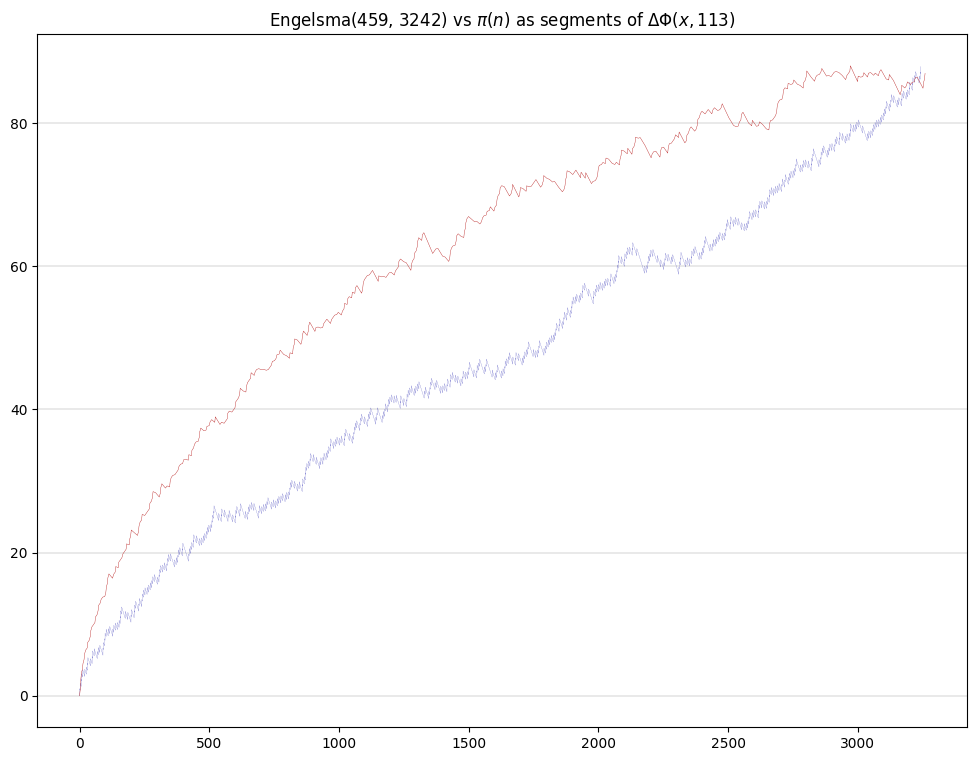

In [36]:
# Plotting pi function vs Engelsma constellation (459,3242) for pk=113
# pts0 = 510900000
# pts1 = pts0 + 70000
# xEngelsma = 766785216 index in G29 for start of driving term for Engelsma constellation
pk = 113
mu_recip = 1
i=0
while (smallp[i] <= pk):
    mu_recip = mu_recip * (smallp[i]-1)/smallp[i]
    i += 1
print(f"pk {pk} mu_recip {mu_recip}")

# create array counting primes
delxC = np.zeros(462)
picount= np.zeros(462)
picount[0]= 0
# picount contains the tops of the vertical segments for Del Phi applied to pi(x)
delxC[1]=smallp[0]
picount[1]= 1-smallp[0]*mu_recip
i=2
while (i < 462):
    delxC[i] = smallp[i-1]
    picount[i] = picount[i-1]+1-del_smallp[i-1]*mu_recip
    i += 1


# create sawtooth array for Delta-Phi
delx = np.cumsum(Engelsma, dtype=float)
delx = np.array([0]+list(delx[:]))
delphi = np.zeros(460)
i=1
while (i < 460):
    delphi[i] = delphi[i-1] + 1 - Engelsma[i-1]*mu_recip
    i += 1

delxB = interleave_np(delx,delx)
delphiB = interleave_np(delphi,(delphi +1))
data_sample = {'x': delxB, 'DelPhi': delphiB}
df = pd.DataFrame(data_sample)
# 
pidf = pd.DataFrame({'x':delxC, 'picnt': picount})

# plotting the two curves
plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
ax.set_title(f"Engelsma(459, 3242) vs $\pi(n)$ as segments of $\Delta \Phi(x,113)$")
ax.grid(axis='y', color='#080408', lw=0.125 )
     
ax.plot(delxB, delphiB, color='#2222AF', lw=0.125, label='DelPhi')
ax.plot(delxC, picount, color='#AF0000', lw=0.25, label='pi(n)')
# ax.set_ylim(-8,12)

plt.show()


In [37]:
# Comparing the counts of gaps in the counterexample vs the counts among the small primes
Eng_gaps, Eng_cnts = np.unique(Engelsma, return_counts=True)
for element in Eng_gaps:
    print(f"{element:3d}",end=" ")
print()
for element in Eng_cnts:
    print(f"{element:3d}",end=" ")
print()

  2   4   6   8  10  12  14  16  18  20  22  24  30 
 88  76 120  41  56  34  15  10  12   2   3   1   1 


In [38]:
pi_gaps, pi_cnts = np.unique(del_smallp[0:459], return_counts=True)
for element in pi_gaps:
    print(f"{element:3d}",end=" ")
print()
for element in pi_cnts:
    print(f"{element:3d}",end=" ")
print()

  1   2   4   6   8  10  12  14  16  18  20  22  24  26  28  34 
  1  86  92 112  44  43  32  18   8   9   3   5   2   2   1   1 


In [39]:
del_smallp[0:459]

array([ 2,  1,  2,  2,  4,  2,  4,  2,  4,  6,  2,  6,  4,  2,  4,  6,  6,
        2,  6,  4,  2,  6,  4,  6,  8,  4,  2,  4,  2,  4, 14,  4,  6,  2,
       10,  2,  6,  6,  4,  6,  6,  2, 10,  2,  4,  2, 12, 12,  4,  2,  4,
        6,  2, 10,  6,  6,  6,  2,  6,  4,  2, 10, 14,  4,  2,  4, 14,  6,
       10,  2,  4,  6,  8,  6,  6,  4,  6,  8,  4,  8, 10,  2, 10,  2,  6,
        4,  6,  8,  4,  2,  4, 12,  8,  4,  8,  4,  6, 12,  2, 18,  6, 10,
        6,  6,  2,  6, 10,  6,  6,  2,  6,  6,  4,  2, 12, 10,  2,  4,  6,
        6,  2, 12,  4,  6,  8, 10,  8, 10,  8,  6,  6,  4,  8,  6,  4,  8,
        4, 14, 10, 12,  2, 10,  2,  4,  2, 10, 14,  4,  2,  4, 14,  4,  2,
        4, 20,  4,  8, 10,  8,  4,  6,  6, 14,  4,  6,  6,  8,  6, 12,  4,
        6,  2, 10,  2,  6, 10,  2, 10,  2,  6, 18,  4,  2,  4,  6,  6,  8,
        6,  6, 22,  2, 10,  8, 10,  6,  6,  8, 12,  4,  6,  6,  2,  6, 12,
       10, 18,  2,  4,  6,  2,  6,  4,  2,  4, 12,  2,  6, 34,  6,  6,  8,
       18, 10, 14,  4,  2

In [40]:
# comparing average gap sizes for small primes, for the counterexample, and for the cycle G(113#)
print(f"pi avg {(3251/458):.4f} vs mu_Eng {(3242/459):.4f} vs mu_113 {(1/mu_recip):.4f}")

pi avg 7.0983 vs mu_Eng 7.0632 vs mu_113 8.7131
